# Imports


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import pad_sequences
from keras import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [5]:
path = '/content/drive/Othercomputers/My laptop/100-Days-Of-DL/RNN/03-SentimentAnalysisUsingRNN'
path

'/content/drive/Othercomputers/My laptop/100-Days-Of-DL/RNN/03-SentimentAnalysisUsingRNN'

# Load dataset and preprocess
The dataset is already tokenized and integer encoded <br>
But the dataset is not padded

In [2]:
(x,y), (x_test,y_test) = imdb.load_data()

In [3]:
x = pad_sequences(x,padding='post')
x_test = pad_sequences(x_test,padding='post')

In [10]:
print(x.shape)
print(y.shape)

(25000, 2494)
(25000,)


# Create and Train model

In [11]:
model = Sequential(name='sentiment_analysis_embeddings.keras')
model.add(Embedding(25000, 3, input_length=200))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sentiment_analysis_embeddings.keras"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(x, y,epochs=10,validation_data=(x_test, y_test)).history

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 161s 202ms/step - accuracy: 0.4990 - loss: 0.6953 - val_accuracy: 0.4982 - val_loss: 0.6992
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 154s 197ms/step - accuracy: 0.4968 - loss: 0.6949 - val_accuracy: 0.4992 - val_loss: 0.6975
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 188s 179ms/step - accuracy: 0.4994 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 153s 196ms/step - accuracy: 0.4968 - loss: 0.6944 - val_accuracy: 0.4987 - val_loss: 0.6947
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 179ms/step - accuracy: 0.4993 - loss: 0.6953 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 178ms/step - accuracy: 0.4877 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6957
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 155s 196ms/step - accuracy: 0.5013 - loss: 0.6934 - val_accuracy: 0.5001 - val_loss: 0.6936
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 188s 178ms/step - accuracy: 0.4944 -

In [13]:
model.save(f"{path}/{model.name}")


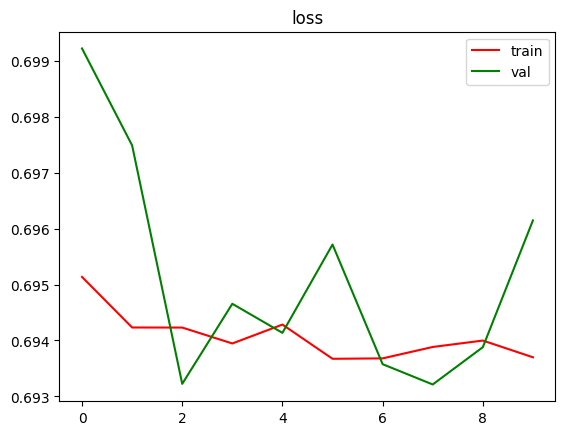

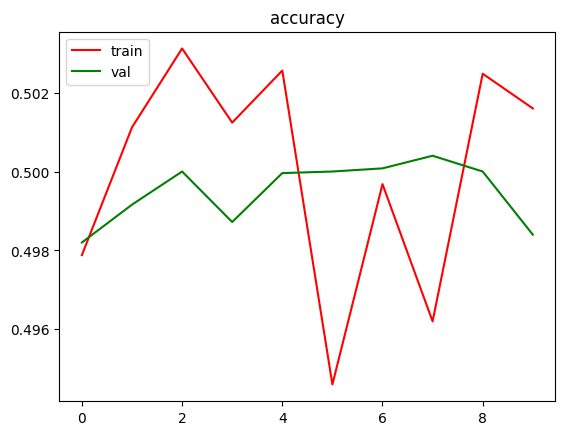

In [14]:
plt.plot(history['loss'], label='train', color='red')
plt.plot(history['val_loss'], label='val', color='green')
plt.title('loss')
plt.legend()
plt.show()

plt.plot(history['accuracy'], label='train', color='red')
plt.plot(history['val_accuracy'], label='val', color='green')
plt.title('accuracy')
plt.legend()
plt.show()

# Load the trained model and check accuracy

In [4]:
model = keras.models.load_model('sentiment_analysis_embeddings.keras')

In [5]:
preds = model.predict(x_test)
preds = np.where(preds >= 0.5, 1, 0)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


In [6]:
accuracy_score(y_test, preds)

0.4984